In [8]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice

In [2]:
# Importing park data

park_data = pd.read_csv('../datasets/Annual Summary Report-All Data.csv', skiprows=2, skip_footer=115)
park_data = park_data.set_index(['ParkName', 'Year'])
park_data = park_data.fillna(0)

for i in park_data.index:
    row = park_data.loc[i]
    for x in range(len(row)):
        item = row[x]
        if type(item) == str:
            item = item.replace(",","")
            row[x] = int(item)
            #print('working...')

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


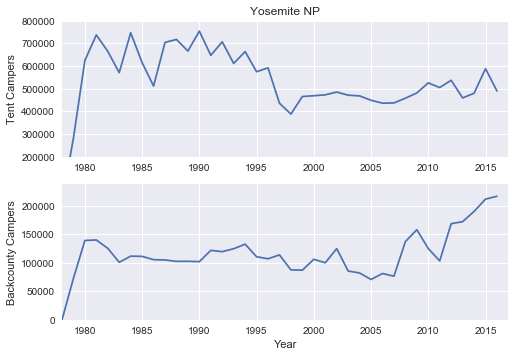

In [3]:
park = 'Yosemite NP'
plt.subplot(2,1,1)
park_data.loc[park]['TentCampers'].plot()
plt.axis([1978,2017,200000,800000])
plt.ylabel('Tent Campers')
plt.title(park)
plt.xlabel('')

plt.subplot(2,1,2)
park_data.loc[park]['Backcountry'].plot()
bcmin = park_data.loc[park]['Backcountry'].min()
bcmax = park_data.loc[park]['Backcountry'].max()
plt.axis([1978,2017, bcmin, bcmax*1.1])
plt.ylabel('Backcounty Campers')
plt.show()

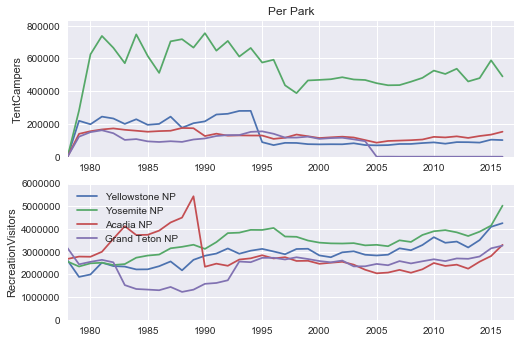

In [5]:
park1 = 'Yellowstone NP'
park2 = 'Yosemite NP'
park3 = 'Acadia NP'
park4 = 'Grand Teton NP'

criteria1 = 'TentCampers'
criteria2 = 'RecreationVisitors'


#Plot 1
plt.subplot(2,1,1)

# Park 1 Tent
a = park_data.loc[park1][criteria1]
b = park_data.loc[park2][criteria1]
c = park_data.loc[park3][criteria1]
d = park_data.loc[park4][criteria1]

a.plot()
b.plot()
c.plot()
d.plot()

plt.ylabel(criteria1)
plt.title('Per Park')

#Axis, label
crit1min = min(a.min(), b.min(), c.min(), d.min())
crit1max = max(a.max(), b.max(), c.max(), d.max())

plt.axis([1978,2017, crit1min, crit1max*1.1])
plt.xlabel('')

#Plot 2
plt.subplot(2,1,2)

# Park 1 Tent
a2 = park_data.loc[park1][criteria2]
b2 = park_data.loc[park2][criteria2]
c2 = park_data.loc[park3][criteria2]
d2 = park_data.loc[park4][criteria2]

a2.plot()
b2.plot()
c2.plot()
d2.plot()

plt.ylabel(criteria2)

#Axis, label
crit2min = min(a2.min(), b2.min(), c2.min(), d2.min())
crit2max = max(a2.max(), b2.max(), c2.max(), d2.max())

plt.axis([1978,2017, crit2min, crit2max*1.1])
plt.legend([park1, park2,park3,park4])
plt.xlabel('')

plt.axis([1978,2017, crit2min, crit2max*1.1])


plt.show()

In [68]:
fv = park_data.reset_index().set_index('ParkName').index.str.contains(' NP')
NP = park_data.reset_index().set_index('ParkName')[fv]

NHS = park_data[park_data.reset_index().set_index('ParkName').index.str.contains(' NHS')]

PKWY = park_data[park_data.reset_index().set_index('ParkName').index.str.contains(' PKWY')]


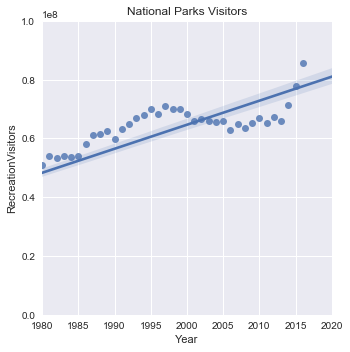

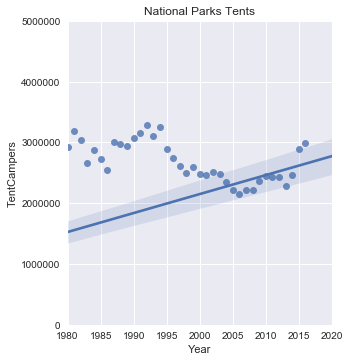

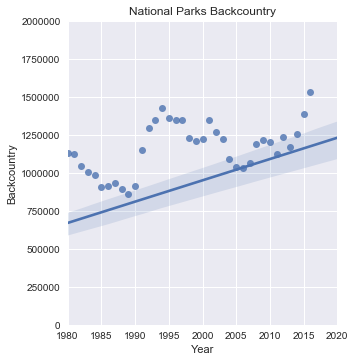

In [82]:
plt.clf()
sns.lmplot(x='Year', y='RecreationVisitors', data = NP.groupby('Year').sum().reset_index())
plt.title('National Parks Visitors')
plt.axis([1980,2020,0,100000000])
sns.lmplot(x='Year', y='TentCampers', data = NP.groupby('Year').sum().reset_index())
plt.title('National Parks Tents')
plt.axis([1980,2020,0,5000000])
sns.lmplot(x='Year', y='Backcountry', data = NP.groupby('Year').sum().reset_index())
plt.title('National Parks Backcountry')
plt.axis([1980,2020,0,2000000])

plt.show()

In [72]:
NP

,Year,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,...,TotalNonRecreationVisitors,TotalRecreationHours,TotalNonRecreationHours,TotalConcessionerLodging,TotalConcessionerCamping,TotalTentCampers,TotalRVCampers,TotalBackcountry,TotalNonRecreationOvernightStays,TotalMiscellaneousOvernightStays
ParkName,,,,,,,,,,,,,,,,,,,,,
Acadia NP,1919,64000,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1920,66500,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1921,69836,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1922,73779,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1923,64200,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1924,71758,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1925,73673,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1926,101256,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
Acadia NP,1927,123699,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783


In [46]:
sumter.groupby('Year').sum()

,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,...,TotalNonRecreationVisitors,TotalRecreationHours,TotalNonRecreationHours,TotalConcessionerLodging,TotalConcessionerCamping,TotalTentCampers,TotalRVCampers,TotalBackcountry,TotalNonRecreationOvernightStays,TotalMiscellaneousOvernightStays
Year,,,,,,,,,,,,,,,,,,,,,
1936,198600,0,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
1937,224500,0,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
1938,200000,0,0,0,0,0,0,0,0,0,...,4765454121,48125381812,2483063225,135027904,37828463,136039174,115428819,74556117,13703609,91703783
1939,136235,0,0,0,0,0,0,0,0,0,...,14296362363,144376145436,7449189675,405083712,113485389,408117522,346286457,223668351,41110827,275111349
1940,75450,0,0,0,0,0,0,0,0,0,...,19061816484,192501527248,9932252900,540111616,151313852,544156696,461715276,298224468,54814436,366815132
1941,294900,0,0,0,0,0,0,0,0,0,...,42889087089,433128436308,22347569025,1215251136,340456167,1224352566,1038859371,671005053,123332481,825334047
1942,139566,0,0,0,0,0,0,0,0,0,...,47654541210,481253818120,24830632250,1350279040,378284630,1360391740,1154288190,745561170,137036090,917037830
1943,179704,0,0,0,0,0,0,0,0,0,...,47654541210,481253818120,24830632250,1350279040,378284630,1360391740,1154288190,745561170,137036090,917037830
1944,264940,0,0,0,0,0,0,0,0,0,...,47654541210,481253818120,24830632250,1350279040,378284630,1360391740,1154288190,745561170,137036090,917037830


In [57]:
designations = ['NB', 'NBP', 'NBS', 'NMP', 'NHP', 'NHS', 'NL', 'NMEM', 'NM', 'NP', 'PKWY', 'PRES', 'NRA', 'NR', 'S&RR', 'NS']

,,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,...,TotalNonRecreationVisitors,TotalRecreationHours,TotalNonRecreationHours,TotalConcessionerLodging,TotalConcessionerCamping,TotalTentCampers,TotalRVCampers,TotalBackcountry,TotalNonRecreationOvernightStays,TotalMiscellaneousOvernightStays
ParkName,Year,,,,,,,,,,,,,,,,,,,,,
